# Exercise 1

## Compute the correlation $ρ$ between $\alpha_t$ and $R_t-R_T$ for given a, b.

$COV(\alpha_t,R_t-R_T) = E[\alpha_t(R_t-R_T)]-E[\alpha_t]E[R_t-R_T] = a\sigma_R^2(T-t)$

$Var[\alpha_t] = E[\alpha_t^2] = (a^2\sigma_R^2+b^2\sigma_W^2)(T-t)$

$Var[R_t-R_T] = \sigma_R^2(T-t)$

$\rho = \frac{COV(\alpha_t,R_t-R_T)}{\sqrt{Var[\alpha_t]Var[R_t-R_T]} } = \sqrt{\frac{1}{1+\frac{b^2\sigma_W^2}{a^2\sigma_R^2}}}$


## Pick values of a, b such that $\alpha_t = E [ R_t − R_T | αt]$ and $ρ = 0.3$

View the problem as an OLS problem, which is $R_t-R_T =  \beta\alpha_t + \epsilon_t$, Therefore, from

$\beta = \rho\frac{\sigma_R}{\sigma_\alpha} = 1$

$\rho = 0.30$

 we can get the solution that
 
 $a = 0.09$
 
 $b = \sqrt{0.0819}\frac{\sigma_R}{\sigma_W}$

## 

In [1]:
\l E:\pycharm\PycharmProjects\kdbq\columbiaHdb\ / Loading and Checking data


In [2]:
\c 50 10000

In [3]:
tb1: select from bin10 where date=2019.01.03
/ Filling nan
tb1: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from tb1
tb1: update Rt: -1+(last mid)%mid by id from tb1
tb1

date       time     id trade     mid      spread        vol         adv           Rt         
---------------------------------------------------------------------------------------------
2019.01.03 09:30:00 0  454071.8  91.715   0.001148717   0.000446367 1.122415e+008 -0.02958659
2019.01.03 09:30:10 0  -171833.3 91.72671 0.001072136   0.000446367 1.122415e+008 -0.02971043
2019.01.03 09:30:20 0  -301.2193 91.58853 7.658112e-005 0.000446367 1.122415e+008 -0.02824664
2019.01.03 09:30:30 0  -78884.65 91.65646 0.000612649   0.000446367 1.122415e+008 -0.02896681
2019.01.03 09:30:40 0  -24705.54 91.60259 0.0008423923  0.000446367 1.122415e+008 -0.02839575
2019.01.03 09:30:50 0  -92166.19 91.58385 0.0005871219  0.000446367 1.122415e+008 -0.02819692
2019.01.03 09:31:00 0  -22823.01 91.56276 0.000663703   0.000446367 1.122415e+008 -0.02797313
2019.01.03 09:31:10 0  -4940.182 91.59088 0.0005615949  0.000446367 1.122415e+008 -0.02827149
2019.01.03 09:31:20 0  -41691.88 91.59322 0.0005360678  0.00

Since we view $R_t$ as a realization of wiener process, the difference of each adjacent pair of $R_t$, such as $R_{t+1}-R_t$, follows the distribution $\sigma_RN(0,\Delta t) (\Delta t = 1  here)$. Therefore we calculate the $\sigma_R$ over the 10 seconds bin and get the std in the unit of 10 seconds

In [4]:
/ estimate sigma_R
/deltas with first element zero
deltas0:{first[x] -': x }
tb1_1 : update sigma_R: sqrt (6*(var deltas0[Rt])) by id from tb1 / time 6 to be in minute frequency
tb1_1

date       time     id trade     mid      spread        vol         adv           Rt          sigma_R    
---------------------------------------------------------------------------------------------------------
2019.01.03 09:30:00 0  454071.8  91.715   0.001148717   0.000446367 1.122415e+008 -0.02958659 0.001080587
2019.01.03 09:30:10 0  -171833.3 91.72671 0.001072136   0.000446367 1.122415e+008 -0.02971043 0.001080587
2019.01.03 09:30:20 0  -301.2193 91.58853 7.658112e-005 0.000446367 1.122415e+008 -0.02824664 0.001080587
2019.01.03 09:30:30 0  -78884.65 91.65646 0.000612649   0.000446367 1.122415e+008 -0.02896681 0.001080587
2019.01.03 09:30:40 0  -24705.54 91.60259 0.0008423923  0.000446367 1.122415e+008 -0.02839575 0.001080587
2019.01.03 09:30:50 0  -92166.19 91.58385 0.0005871219  0.000446367 1.122415e+008 -0.02819692 0.001080587
2019.01.03 09:31:00 0  -22823.01 91.56276 0.000663703   0.000446367 1.122415e+008 -0.02797313 0.001080587
2019.01.03 09:31:10 0  -4940.182 91.59088 0.00

In [5]:
/pseudo standard gaussian random number generator

u12: {[n] -6f+sum n cut (12* n)?1f}
/ generate wt series with w0 = 0
tb1_2: update wt: sigma_R*sums (0,u12[-1+count time]) %sqrt 6 by id from tb1_1 /%6 to change frequency from seconds to minutes
tb1_3: update at:(Rt*0.09)+(sqrt 0.0819)*wt- last wt by id from tb1_2
tb1_3: update diff_at: 0^(at-xprev[60;at])%10 by id from tb1_3 / in minute frequency
select date,time,id,sigma_R,wt,at,diff_at from tb1_3

date       time     id sigma_R     wt            at           diff_at
---------------------------------------------------------------------
2019.01.03 09:30:00 0  0.001080587 0             -0.004862345 0      
2019.01.03 09:30:10 0  0.001080587 -0.0003140073 -0.004963354 0      
2019.01.03 09:30:20 0  0.001080587 -0.0004800894 -0.004879142 0      
2019.01.03 09:30:30 0  0.001080587 -0.0006981943 -0.005006375 0      
2019.01.03 09:30:40 0  0.001080587 7.338283e-005 -0.004734168 0      
2019.01.03 09:30:50 0  0.001080587 -0.0002051903 -0.004795996 0      
2019.01.03 09:31:00 0  0.001080587 -0.0005659077 -0.004879085 0      
2019.01.03 09:31:10 0  0.001080587 -0.0003292024 -0.004838198 0      
2019.01.03 09:31:20 0  0.001080587 0.0001964824  -0.004689993 0      
2019.01.03 09:31:30 0  0.001080587 0.0001355396  -0.004720852 0      
2019.01.03 09:31:40 0  0.001080587 -0.0001771738 -0.004754402 0      
2019.01.03 09:31:50 0  0.001080587 -0.0006220371 -0.004899625 0      
2019.01.03 09:32:00 

# Exercise 2

## Simulate the target impact state for the optimal trading strategy

In [6]:
beta_float : log[2]%60
beta_float
tb2: update It: 0.5* at-diff_at%beta_float by id from tb1_3
select date,time,id,at,diff_at,It from tb2

0.01155245


date       time     id at           diff_at It          
--------------------------------------------------------
2019.01.03 09:30:00 0  -0.004862345 0       -0.002431172
2019.01.03 09:30:10 0  -0.004963354 0       -0.002481677
2019.01.03 09:30:20 0  -0.004879142 0       -0.002439571
2019.01.03 09:30:30 0  -0.005006375 0       -0.002503187
2019.01.03 09:30:40 0  -0.004734168 0       -0.002367084
2019.01.03 09:30:50 0  -0.004795996 0       -0.002397998
2019.01.03 09:31:00 0  -0.004879085 0       -0.002439543
2019.01.03 09:31:10 0  -0.004838198 0       -0.002419099
2019.01.03 09:31:20 0  -0.004689993 0       -0.002344997
2019.01.03 09:31:30 0  -0.004720852 0       -0.002360426
2019.01.03 09:31:40 0  -0.004754402 0       -0.002377201
2019.01.03 09:31:50 0  -0.004899625 0       -0.002449813
2019.01.03 09:32:00 0  -0.005129493 0       -0.002564746
2019.01.03 09:32:10 0  -0.005189225 0       -0.002594613
2019.01.03 09:32:20 0  -0.005561006 0       -0.002780503
2019.01.03 09:32:30 0  -0.00536

## Given an impact state, simulate the corresponding trades

In [7]:
tb2_1: update dqt:((beta_float*It%6)+deltas0[It])%(8*vol*sqrt (6*60*6.5))%adv by id from tb2
select date,time,id,dqt from tb2_1

date       time     id dqt      
--------------------------------
2019.01.03 09:30:00 0  -3041.6  
2019.01.03 09:30:10 0  -35921.29
2019.01.03 09:30:20 0  24307.26 
2019.01.03 09:30:30 0  -44468.17
2019.01.03 09:30:40 0  85475.3  
2019.01.03 09:30:50 0  -23087.37
2019.01.03 09:31:00 0  -30046.66
2019.01.03 09:31:10 0  10257.37 
2019.01.03 09:31:20 0  45216.08 
2019.01.03 09:31:30 0  -12978.76
2019.01.03 09:31:40 0  -13874.23
2019.01.03 09:31:50 0  -50246.08
2019.01.03 09:32:00 0  -77889.75
2019.01.03 09:32:10 0  -22652.56
2019.01.03 09:32:20 0  -124265.8
2019.01.03 09:32:30 0  58745.06 
2019.01.03 09:32:40 0  -70895.7 
2019.01.03 09:32:50 0  59377.5  
2019.01.03 09:33:00 0  6852.118 
2019.01.03 09:33:10 0  64379.62 
2019.01.03 09:33:20 0  -11556.84
2019.01.03 09:33:30 0  -1050.887
2019.01.03 09:33:40 0  51498.15 
2019.01.03 09:33:50 0  -19601.1 
2019.01.03 09:34:00 0  17493.21 
2019.01.03 09:34:10 0  37648.37 
2019.01.03 09:34:20 0  82634.24 
2019.01.03 09:34:30 0  -39269.91
2019.01.03

## For each stock, compute the final order size as a percent of adv.Provide a scatter-plot of alpha strength against optimal order size across the whole universe of stocks and the full year of 2019. Here, alpha strength means the alpha at the beginning of the day, i.e., α0.

In [8]:
tb2_2: select first at,final_order_per: sum dqt%adv by id from tb2_1
tb2_2

id| at            final_order_per
--| -----------------------------
0 | -0.004862345  -0.07278774    
1 | 0.004197255   -0.0568033     
2 | -0.002083366  -0.01275963    
3 | -0.00621884   -0.0522837     
4 | 0.003598055   0.04943349     
5 | 0.004702884   0.0006103578   
6 | -0.003348036  -0.08759164    
7 | 0.003348736   0.07511919     
8 | 0.003908461   -0.03142794    
9 | 0.004219729   -0.06057841    
10| 0.001152932   0.006003659    
11| 0.003568397   -0.02362839    
12| 0.004568671   0.0375332      
13| -0.004801279  0.008571896    
14| 0.002948775   0.0438875      
15| -0.0007660121 0.003392258    
16| -0.02435545   -0.04472164    
17| -0.006704924  -0.01921703    
18| -0.004743082  -0.03443163    
19| -0.008804309  -0.07233433    
20| 3.996683e-005 0.03473952     
21| 0.005338456   0.04718433     
22| 0.01167275    0.07632916     
23| -0.00439078   -0.04837097    
24| -0.004979217  -0.06009726    
25| -0.003573456  0.003709497    
26| -0.003359179  -0.02236102    
27| -0.0083993

In [9]:
tb2_3: select first at,optimal_order_size: sum dqt,optimal_order_percent: sum dqt%adv by id from tb2_1
tb2_3
save `E:/pycharm/PycharmProjects/kdbq/w9/tb2_3.csv

id| at            optimal_order_size optimal_order_percent
--| ------------------------------------------------------
0 | -0.004862345  -8169804           -0.07278774          
1 | 0.004197255   -2049012           -0.0568033           
2 | -0.002083366  -176953.1          -0.01275963          
3 | -0.00621884   -623631.4          -0.0522837           
4 | 0.003598055   998088.9           0.04943349           
5 | 0.004702884   4840.818           0.0006103578         
6 | -0.003348036  -1568673           -0.08759164          
7 | 0.003348736   745362.7           0.07511919           
8 | 0.003908461   -1085132           -0.03142794          
9 | 0.004219729   -1128163           -0.06057841          
10| 0.001152932   517908             0.006003659          
11| 0.003568397   -1372151           -0.02362839          
12| 0.004568671   1124583            0.0375332            
13| -0.004801279  131850.8           0.008571896          
14| 0.002948775   4.337563e+007      0.0438875          

`:E:/pycharm/PycharmProjects/kdbq/w9/tb2_3.csv


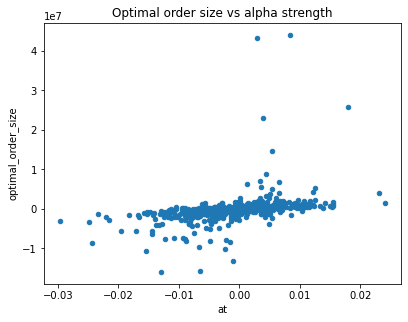

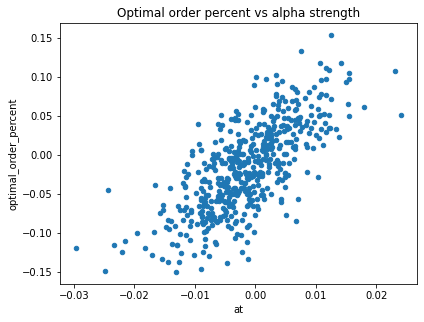

In [10]:
/plot
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)import warnings
p)warnings.filterwarnings("ignore")
p)q3=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w9/tb2_3.csv')
p)q3.plot.scatter(x = 'at',y = 'optimal_order_size')
p)plt.title('Optimal order size vs alpha strength')
p)plt.show()
p)q3.plot.scatter(x = 'at',y = 'optimal_order_percent')
p)plt.title('Optimal order percent vs alpha strength')
p)plt.show()

In [11]:
/ optimal order size
dts:select distinct date from bin10
dts_list: exec date from dts
size_vs_alpha:{[dt]
    tb1:select from bin10 where date=dt;
    tb1: update reverse fills reverse date,
         reverse fills reverse mid,
         reverse fills reverse spread,
         reverse fills reverse vol,
         reverse fills reverse adv
         by id from tb1;
    tb1: update Rt: -1+(last mid)%mid by id from tb1;
    tb1_1 : update sigma_R: sqrt (6*(var deltas0[Rt])) by id from tb1; / time 6 to get minute frequency volatility
    tb1_2: update wt: sigma_R*sums (0,u12[-1+count time]) %sqrt 6 by id from tb1_1; / %6 to get minute frequency standard normal distribution
    tb1_3: update at:(Rt*0.09)+(sqrt 0.0819)*wt- last wt by id from tb1_2;
    tb1_3: update diff_at: 0^(at-xprev[60;at])%10 by id from tb1_3; / in minute freq
    tb2: update It: 0.5* at-diff_at%beta_float by id from tb1_3;
    tb2_1: update dqt:((beta_float*It%6)+deltas0[It])%(8*vol*sqrt (6*60*6.5))%adv by id from tb2; / %6 to get minute frequency
    select first at,optimal_order_size: sum dqt,optimal_order_percent: sum dqt%adv by date,id from tb2_1
    }


In [12]:
\t tb3:raze size_vs_alpha peach dts_list

39339


In [13]:
/ save table
save `E:/pycharm/PycharmProjects/kdbq/w9/tb3.csv

`:E:/pycharm/PycharmProjects/kdbq/w9/tb3.csv


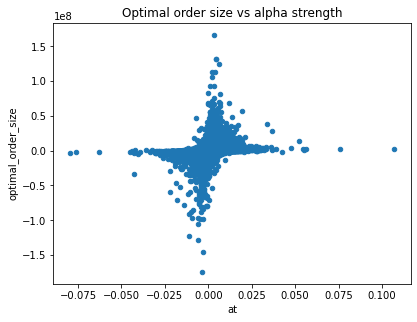

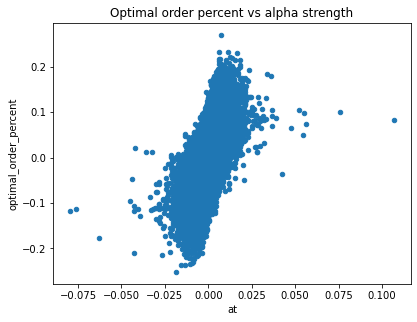

In [14]:
/plot
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)q3=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w9/tb3.csv')
p)q3.plot.scatter(x = 'at',y = 'optimal_order_size')
p)plt.title('Optimal order size vs alpha strength')
p)plt.show()
p)q3.plot.scatter(x = 'at',y = 'optimal_order_percent')
p)plt.title('Optimal order percent vs alpha strength')
p)plt.show()